## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in the DataFrame.
mice = combined_data_df["Mouse ID"].count()
print (mice)

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_total_count = clean_study_data_complete["Mouse ID"].count()
print (mice_total_count)


1880


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

means = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviations = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats = pd.DataFrame(means)
new_summary = summary_stats.rename(columns={"Tumor Volume (mm3)": "Mean"})

new_summary ["Medians"] = medians
new_summary ["Variance"] = variances
new_summary ["STD"] = standard_deviations
new_summary ["SEM"] = sems

new_summary

,Mean,Medians,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

data = clean_study_data_complete.groupby('Drug Regimen')
summary_stats = data.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

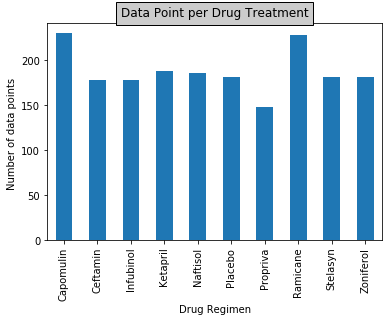

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

pp_graph = clean_study_data_complete.groupby('Drug Regimen')
mice_per_tp = pp_graph['Drug Regimen'].count()

count_chart = mice_per_tp.plot(kind='bar')
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of data points ")
count_chart.set_title ("Data Point per Drug Treatment", bbox={'facecolor':'0.8', 'pad':5})

plt.show()
plt.tight_layout()

plt.savefig('barplot1')



In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(pp_graph))

pp_graphs = clean_study_data_complete['Drug Regimen'].value_counts()
tick_locations = [x for x in x_axis]


plt.figure(figsize=(5,3))
plt.bar(pp_graphs.index.values, pp_graphs.values, color='b', alpha=0.75, align="center")
plt.xticks(tick_locations, pp_graphs.index.values["Drug Regimen"], rotation='vertical')

plt.title("Data Point per Drug Treatment", bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


plt.savefig('barplot2')

NameError: name 'np' is not defined

## Pie Plots

In [21]:
gender_grouped = clean_study_data_complete.groupby("Sex").count()
gender_grouped


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


/Users/yuliyalikhonina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


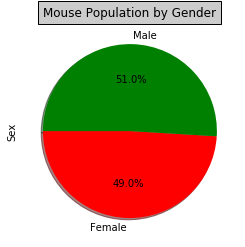

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['red', 'green']
plt.pie(gender_size, labels=gender_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title ('Mouse Population by Gender', bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Sex')

plt.savefig('pieplot1')

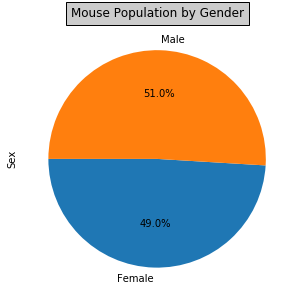

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_2 = gender_grouped['Mouse ID'].plot.pie(y = gender_size, figsize = (5,5), autopct="%1.1f%%", startangle=180)
plt.title ('Mouse Population by Gender', bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Sex')

plt.savefig('pieplot2')

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

capomulin_df = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == 'Capomulin', :]
ramicane_df = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == 'Ramicane', :]
infubinol_df = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == 'Infubinol', :]
ceftamin_df = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == 'Ceftamin', :]
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [26]:
cap_final = capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame (cap_final)
cap_merge = pd.merge(cap_vol, clean_study_data_complete, on = ('Mouse ID', 'Timepoint'), how = 'left')
cap_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [31]:
tumor_vol = cap_merge['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
Values below 20.70456164999999 are outliers.
Values above 51.83201549 are outliers.


In [28]:
ram_final = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ram_vol = pd.DataFrame (ram_final)
ram_merge = pd.merge(ram_vol, clean_study_data_complete, on = ('Mouse ID', 'Timepoint'), how = 'left')
ram_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [32]:
tumor_vol2 = ram_merge['Tumor Volume (mm3)']
quartiles = tumor_vol2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")


The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
Values below 17.912664470000003 are outliers.
Values above 54.30681135 are outliers.


In [30]:
inf_final = infubinol_df.groupby('Mouse ID').max()['Timepoint']
inf_vol = pd.DataFrame (inf_final)
inf_merge = pd.merge(inf_vol, clean_study_data_complete, on = ('Mouse ID', 'Timepoint'), how = 'left')
inf_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [34]:
tumor_vol3 = inf_merge['Tumor Volume (mm3)']
quartiles = tumor_vol3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")

The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
Values below 36.83290494999999 are outliers.
Values above 82.74144559000001 are outliers.


In [37]:
cef_final = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
cef_vol = pd.DataFrame (cef_final)
cef_merge = pd.merge(cef_vol, clean_study_data_complete, on = ('Mouse ID', 'Timepoint'), how = 'left')
cef_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [38]:
tumor_vol4 = cef_merge['Tumor Volume (mm3)']
quartiles = tumor_vol4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")


The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
Values below 25.355449580000002 are outliers.
Values above 87.66645829999999 are outliers.


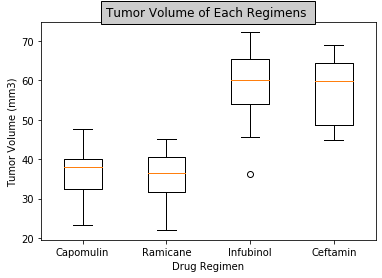

<Figure size 432x288 with 0 Axes>

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data =[tumor_vol, tumor_vol2, tumor_vol3, tumor_vol4]
fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Volume of Each Regimens ', bbox={'facecolor':'0.8', 'pad':5})
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(plot_data, labels = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

plt.savefig('boxplot')

## Line and Scatter Plots

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_df = capomulin_df.loc[capomulin_df['Mouse ID'] == "l509"]
line_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


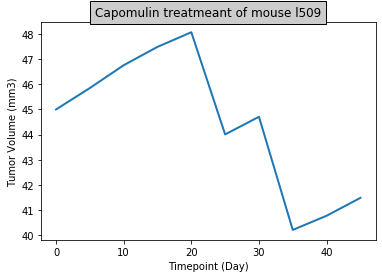

<Figure size 432x288 with 0 Axes>

In [43]:
line_tp = line_df['Timepoint']
print (list (line_tp) )
line_size = line_df ['Tumor Volume (mm3)']

plt.plot(line_tp, line_size, linewidth=2, markersize=12 )
plt.title('Capomulin treatmeant of mouse l509', bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('Timepoint (Day)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

plt.savefig('lineplot')


In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_avg = capomulin_df.groupby('Mouse ID').mean()
cap_avg ['Tumor Volume (mm3)'].head()


Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

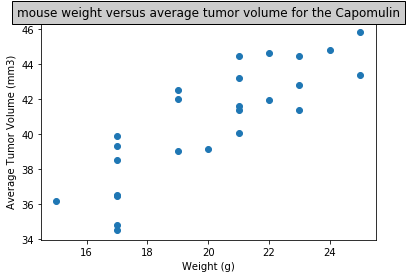

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(cap_avg['Weight (g)'], cap_avg ['Tumor Volume (mm3)'])
plt.title('mouse weight versus average tumor volume for the Capomulin', bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

plt.savefig('scatterplot')

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round (st.pearsonr(cap_avg['Weight (g)'], cap_avg ['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between both factors is {corr}")

The correlation between both factors is 0.84


In [47]:
lin_model = st.linregress(cap_avg['Weight (g)'], cap_avg ['Tumor Volume (mm3)'])
lin_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [48]:
slope = 0.9544396890241045
intercept=21.552160532685015

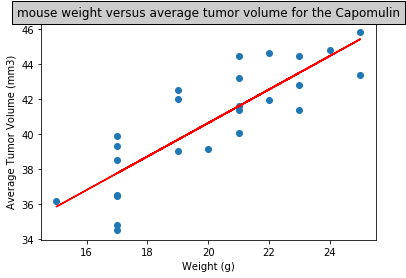

In [49]:
y_values = cap_avg ['Weight (g)'] * slope + intercept

plt.scatter(cap_avg['Weight (g)'], cap_avg ['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'], y_values,color="red")
plt.title('mouse weight versus average tumor volume for the Capomulin', bbox={'facecolor':'0.8', 'pad':5})
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('linearregression')